Waste Management using CNN Model


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_path="Dataset/TRAIN"
test_path="Dataset/TEST"

In [8]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:
#visualization
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})
 



100%|██████████| 9999/9999 [01:03<00:00, 157.22it/s]


In [12]:
data.shape

(22564, 2)

Label Distribution - Pie Chart

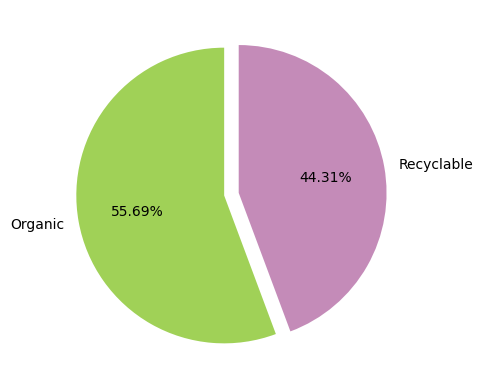

In [14]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

Label Frequency (Bar Plot)

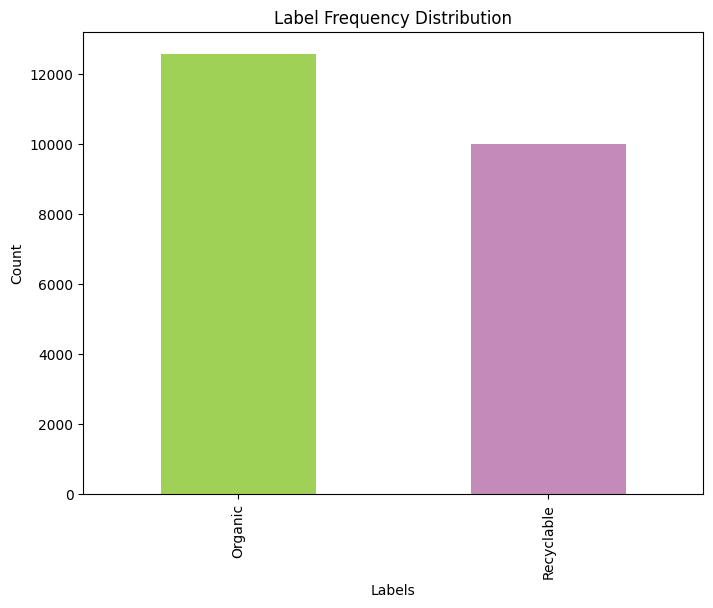

In [17]:
data['label'] = data['label'].replace({'TRAIN\O': 'Organic', 'TRAIN\R': 'Recyclable'})
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title('Label Frequency Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Image Size Distribution (Histogram)

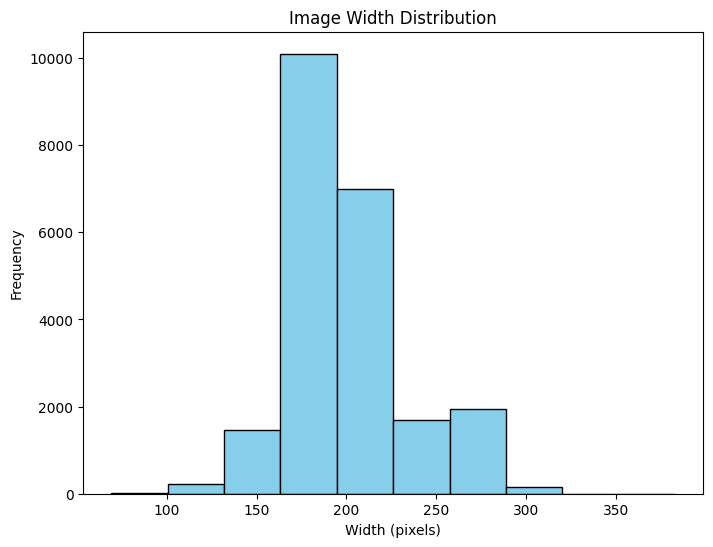

In [18]:
image_sizes = [img.shape[0] for img in x_data] 
plt.figure(figsize=(8, 6))
plt.hist(image_sizes, bins=10, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.show()


Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['encoded_labels'] = encoder.fit_transform(data['label'])
print(data.head())

                                               image    label  encoded_labels
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  Organic               0
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...  Organic               0
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...  Organic               0
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  Organic               0
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Organic               0


Image Preview

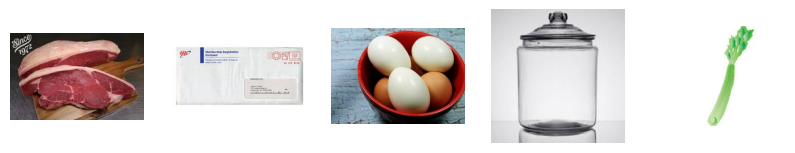

In [21]:
sample_images = np.random.choice(data['image'], 5)  
plt.figure(figsize=(10, 10))

for i, img in enumerate(sample_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

Data Splitting into training and validation datasets

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_data, data['encoded_labels'], test_size=0.2, stratify=data['encoded_labels'], random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Validation Data Size: {len(x_val)}")

Training Data Size: 18051
Validation Data Size: 4513
